### 데이터를 메모리에 로딩하기

In [4]:
import pandas as pd
df = pd.read_csv("../data/iris.csv")

In [20]:
# 판다스를 이용한 데이터 점검
print("shape of data in (rows, columns) is ", str(df.shape))
print(df.head())
df.describe().transpose # 각 특징의 요약 통계량

shape of data in (rows, columns) is  (150, 5)
   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm species  
0                0.2  setosa  
1                0.2  setosa  
2                0.2  setosa  
3                0.2  setosa  
4                0.2  setosa  


<bound method DataFrame.transpose of        sepal length in cm  sepal width in cm  petal length in cm  \
count          150.000000         150.000000          150.000000   
mean             5.843333           3.054000            3.758667   
std              0.828066           0.433594            1.764420   
min              4.300000           2.000000            1.000000   
25%              5.100000           2.800000            1.600000   
50%              5.800000           3.000000            4.350000   
75%              6.400000           3.300000            5.100000   
max              7.900000           4.400000            6.900000   

       petal width in cm  
count         150.000000  
mean            1.198667  
std             0.763161  
min             0.100000  
25%             0.300000  
50%             1.300000  
75%             1.800000  
max             2.500000  >

seaborn 사용
-----
seaborn의 플롯 루틴을 페어 플롯이라 한다. 이 루틴을 통해 관계를 찾아내고, 후보들을 그룹화하고, 가능한 이상치를 찾아내고, 분석을 위해 어떤 전략을 사용할지에 관한 인사이트를 얻을 수 있다. 대각선을 제외한 각 셀은 쌍의 스캐터 플롯이고, 대각선은 단일 변량 분포다. 

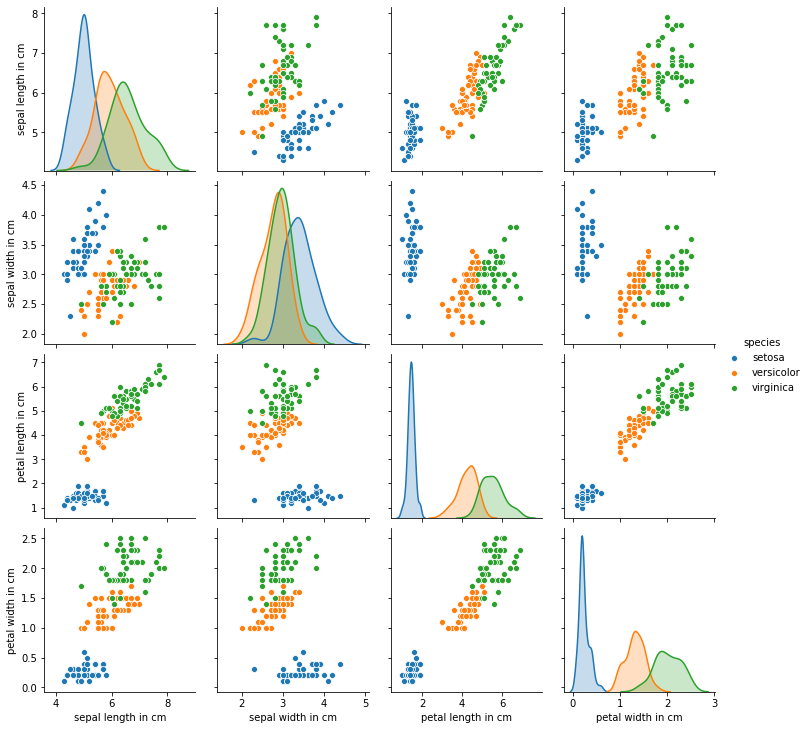

In [7]:
import seaborn as sns
sns.pairplot(df, hue='species')

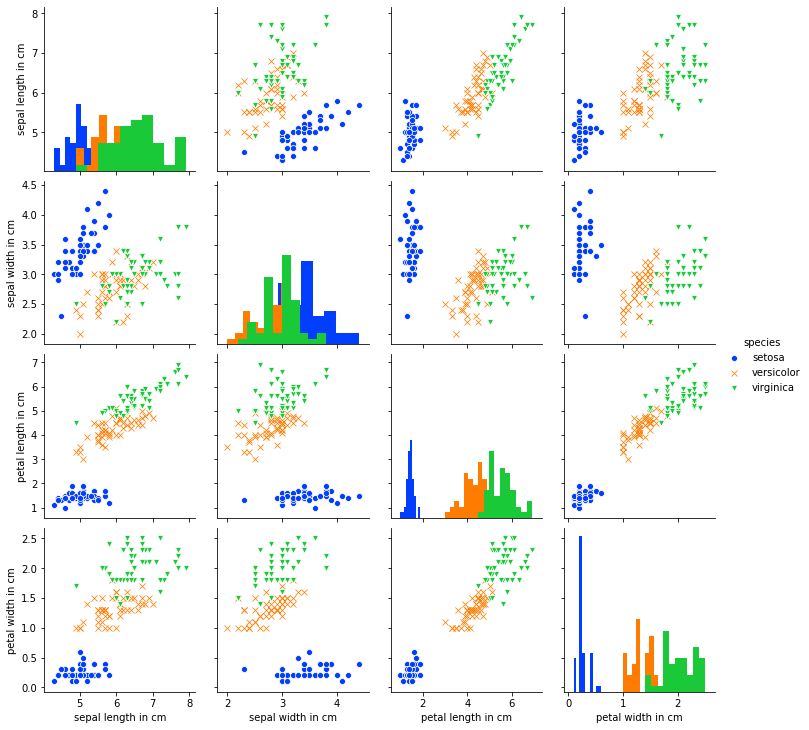

In [8]:
# 차트의 외양 바꾸기. diag_kind는 다이어그램을 지정
# 대각선상에서 히스토그램을 보기 위해 다시 플롯
sns.pairplot(df,hue='species',diag_kind='hist',palette='bright',markers=['o','x','v'])

3개 중 2개의 변수만 선택하고 lmplot으로 이변량 스캐터 플롯을 표현할 수도 있다. 데이터에 5가지 이상의 특징이 있다면 중요한 변수들 사이의 관계는 한 창에 다 보여지지 않을 수도 있다. 중요한 관계들을 분리해서 보여주고 싶을 때 아래와 같이 한다.

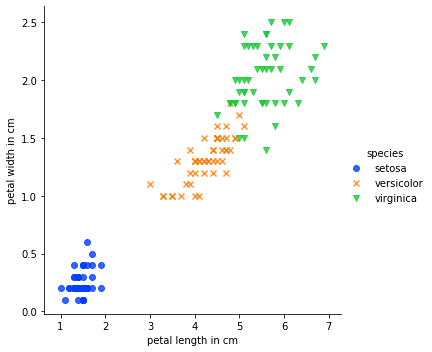

In [10]:
sns.lmplot(x='petal length in cm', y='petal width in cm', hue='species', data=df, fit_reg=False, palette='bright', markers=['o','x','v'])

인기 있는 단일 특징 벡터 시각화 플롯은 바이올린 플롯이다. 이는 값의 분포와 클래스(=객체=특징벡터)의 분산을 한 플롯에 표현할 수 있다. 각 바이올린은 확률 밀도를 보여주는 단일 변량 분포이고, 수직의 박스 플롯과 같이 생긴 형태로 클래스의 값의 범위를 표현한다.
seaborn은 기본 설정으로 중앙값과 사분위수 범위(25~75%)를 각 바이올린에서 보여준다. inner 옵션을 사용해서 시각화 범위를 조정할 수도 있다.

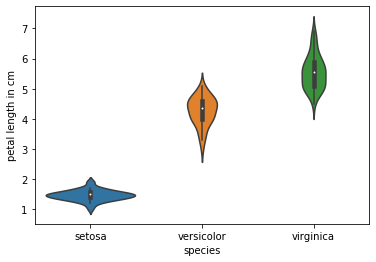

In [11]:
sns.violinplot(x='species', y='petal length in cm', data=df)

데이터 변환: scikit-learn을 활용한 PCA와 LDA
-----
데이터 과학자들은 비슷한 정보를 좀더 작은 수의 차원으로 표현하기 위해 가장 전체적이거나 가장 중요한 변환축을 회전시킨다. 여기서 4개의 특징을 갖는 iris 데이터를 2차원으로 변환해보자.

*PCA: Principal Component Analysis(주요 요소 분석)

In [14]:
#PCA 사용해서 차원 수 줄이기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df[['sepal length in cm',
                                'sepal width in cm',
                                'petal length in cm',
                                'petal length in cm']])
# 결과 데이터를 pandas dataframe으로 생성하고, 이를 점검하기 위해 .head() 사용
df_pca = pd.DataFrame(data=out_pca, columns=['pca1','pca2'])
print(df_pca.head())

pca1      pca2
0 -3.431920  0.315725
1 -3.454661 -0.178938
2 -3.660044 -0.150349
3 -3.410929 -0.332658
4 -3.466954  0.319383


위 결과에는 레이블 열이 없다. 원래 데이터프레임에서 데이터를 절단해 열을 더해준다.

pca1      pca2 species
0 -3.431920  0.315725  setosa
1 -3.454661 -0.178938  setosa
2 -3.660044 -0.150349  setosa
3 -3.410929 -0.332658  setosa
4 -3.466954  0.319383  setosa


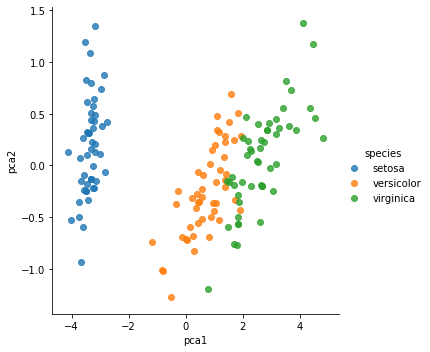

In [15]:
df_pca = pd.concat([df_pca, df[['species']]],axis=1)
print(df_pca.head())
sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

PCA의 목표는 데이터를 가장 큰 변동이 있는 방향으로 맞추는 것이다. 허자먼 PCA는 데이터의 가장 중요한 정보들을 무시한다. 레이블이 들어있지 않았던 것도 이것의 예로 들 수 있다. 레이블을 포함했다면 더 나은 변환 벡터를 뽑아낼 수 있었을 것이다. 가장 인기 있는 레이블을 포함한 차원 감소 기법은 선형 판별 분석(LDA)이다. 아래 코드는 클래스 레이블별로 그룹을 지정하고, 클래스별로 가장 많은 분리를 생성하는 방향을 찾는다.
*NOTE: Ignoring labels in the transformation step may be desirable for some problem statements, especially those with unreliable class labels, to avoid pulling the reduced components vectors in an unhelpful direction. For this reason, I recommend to always start with PCA, before deciding if I need further  work or not.  Indeed unless your data set is large, the computation time for PCA is short, so there's no harm in starting here. 

lda1      lda2 species
0  8.084953  0.328454  setosa
1  7.147163 -0.755473  setosa
2  7.511378 -0.238078  setosa
3  6.837676 -0.642885  setosa
4  8.157814  0.540639  setosa


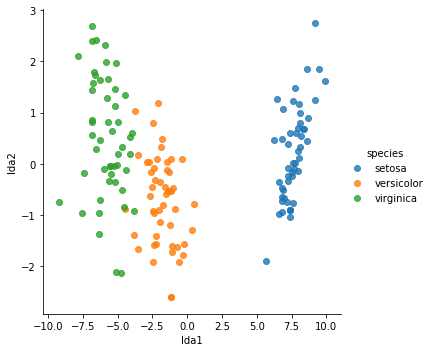

In [16]:
# LDA를 사용해 차원 수 줄이기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

# 데이터프레임 포맷 설정하기
out_lda = lda.fit_transform(X=df.iloc[:,:4], y=df['species']) #iloc 나중에 공부할 것
df_lda = pd.DataFrame(data=out_lda, columns=['lda1','lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis=1)

# 데이터 점검
print(df_lda.head())

sns.lmplot(x='lda1', y='lda2', hue='species', data=df_lda, fit_reg=False)

위 스캐터 플롯은 PCA와 LDA가 데이터에 대해 같은 변환을 한 것이라고 생각하게 할 수 있다. 바이올린 플롯을 사용해 첫 번째 요소를 좀 더 관찰해보자.

Text(0.5, 1.0, 'Violin plot: Feature = PCA_1')

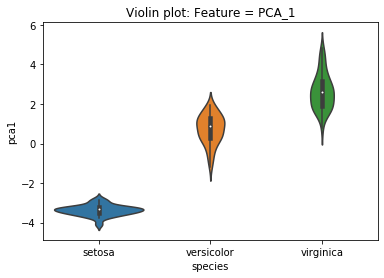

In [18]:
sns.violinplot(x='species', y='pca1', data=df_pca).set_title("Violin plot: Feature = PCA_1")

Text(0.5, 1.0, 'Violin plot: Feature = LDA_1')

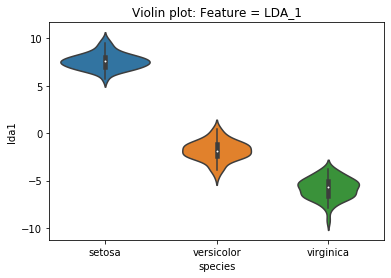

In [19]:
sns.violinplot(x='species', y='lda1', data=df_lda).set_title("Violin plot: Feature = LDA_1")

Quantify Separation: K-means Clustering and Silhouette Score
-----
데이터에서 가장 어려운 클래스 분리는 흰여로(versicolor)와 질경이(virginica)다. 각 클래스에 대한 바이올린은 두 기법이 서로 다른 결과를 생성한다는 것을 보여준다. 두 플롯에 대해 부채붓꽃(setosa)의 분포를 기준으로 사용하면 LDA의 흰여로 분포는 PCA보다 타이트하므로(그래프가 넓고 짧다), 이것의 사분위수 범위가 질경이 분포의 사분위수 범위로부터 더욱 분리된다. 이보다 정교한 분석을 원한다면 클러스터링 알고리즘을 적용하여 이 차이를 Quantify(계량화) 하면 된다. 이 데이터를 그룹화할땐 **K-평균 클러스터링 알고리즘**을 사용하고, 클러스터의 압축성을 점수화할땐 **실루엣 계수(silhouette coefficient)**라는 지표를 사용한다. 높은 점수는 압축된 정도가 더 큰 클러스터를 의미한다. Since the k-means algorithm is very straightforward and the quality of the grouping is directly related to the quality of the input data, tighter clusters proves that the input features separate the classes better.

In [21]:
# K-평균으로 클러스터링하고 실루엣 점수 점검
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-평균 객체 초기화
kmns = KMeans(n_clusters=3, random_state=42)

# 알고리즘을 pca에 적합시키고 실루엣 점수 산정
out_kms_pca = kmns.fit_predict(out_pca)
silhouette = silhouette_score(out_pca, out_kms_pca)
print("PCA silhouette score = " + str(silhouette))

# fit AL to lda and find silhouette score
out_kms_lda = kmns.fit_predict(out_lda)
silhouette = silhouette_score(out_lda, out_kms_lda)
print("LDA silhouette score = %2f " % silhouette)

PCA silhouette score = 0.6085267287511381
LDA silhouette score = 0.656399 


The output above shows that the LDA classes are better separated. This makes sense because the LDA function had more information, namely the classes to be separated.

의사 결정 또는 예측
-----
예측을 하기 전 데이터를 훈련 데이터와 테스트 데이터로 나눠야 한다. 그리고 훈련 데이터에 기반해 예측 모델을 수립하고, F1 점수를 사용해 테스트 데이터를 점수화해본다.

In [22]:
# Split into train/validation/test set
from sklearn.model_selection import train_test_split
#random_state는 랜덤 시드를 말한다! 이거 랜덤 시드 기능이 안에 포함되어 있는 모양이더라.
df_train, df_test = train_test_split(df_lda, test_size=0.3, random_state=42)

# Sanity check(데이터 점검)
print('train set shape = ', str(df_train.shape))
print('test set shape = ', str(df_test.shape))
print(df_train.head())

train set shape =  (105, 3)
test set shape =  (45, 3)
         lda1      lda2     species
81  -0.598443 -1.923348  versicolor
133 -3.809721 -0.934519   virginica
137 -4.993563  0.184883   virginica
75  -1.439522 -0.123147  versicolor
109 -6.872871  2.694581   virginica


이제 예측으로 넘어가보자. 첫번째로 서포트 벡터 분류기(svc) 모듈을 사용해 서포트 벡터 머신(svm)을 시도해보자. 사이킷런에 있는 분류기 객체는 PCA와 LDA 변환에서 사용했던 것과 비슷한 API를 제공한다. 그러므로 라이브러리를 이해하게 되면 다른 변환, 분류기, 기법을 쉽게 적용할 수 있을 것이다.
...하려했는데 svm, 랜덤 포레스트 다 내가 모르는 개념이라서 전혀 이해할 수 없음. 이 파트는 패스.